In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print(pd.__version__)
print(np.__version__)

/var/folders/9c/7jq79dg16qqdqst791mgh63w0000gn/T/ipykernel_32807/3131691620.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


2.2.0
1.25.2


Loading the data.

In [2]:
iris = pd.read_csv('../../Downloads/Data for ML/iris.csv')
print(iris.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


Plotting the data. 

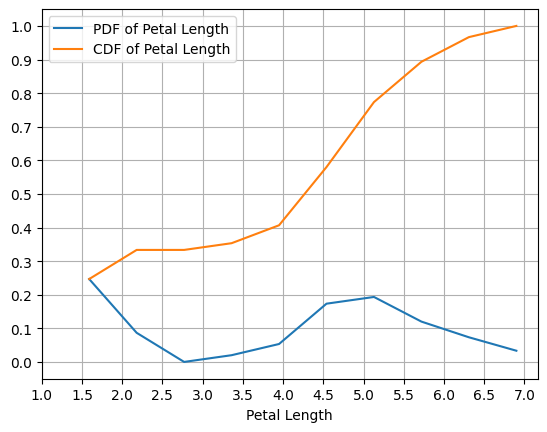

In [3]:
pl = iris['petal.length']
count, bin_edges = np.histogram(pl)
pdf_pl = count/len(pl)
cdf_pl = np.cumsum(pdf_pl)

plt.plot(bin_edges[1:], pdf_pl, label='PDF of Petal Length')
plt.plot(bin_edges[1:], cdf_pl, label='CDF of Petal Length')

plt.xlabel('Petal Length')
plt.xticks(ticks=np.arange(1.0, 7.5, 0.5))
plt.yticks(ticks=np.arange(0, 1.1, 0.1))
plt.grid()
plt.legend()
plt.show()

In [5]:
mean_pl: float = (np.mean(pl))
std_pl: float = np.std(pl)
variance_pl: float = np.var(pl)
median_pl: float = np.median(pl)
mode_pl: float = np.max(pl)
skewness_pl: float = (mean_pl - mode_pl)/std_pl
print(f'{mean_pl =  }, {std_pl = }, {variance_pl = }, {median_pl = }, {skewness_pl = }')

mean_pl =  3.7580000000000005, std_pl = 1.759404065775303, variance_pl = 3.0955026666666665, median_pl = 4.35, skewness_pl = -1.7858319536254108


Standardization of Petal length. 
Standardizing data in machine learning is important for several reasons:
1. Meaningful Comparison: Standardizing data allows for meaningful comparison between different features. It removes the units of measurement, ensuring that each feature contributes equally to the analysis.
2. Algorithm Sensitivity: Some machine learning algorithms are sensitive to the scale of the input features. Standardizing the data helps prevent features with larger scales from dominating those with smaller scales, which can improve the performance and stability of the model.
3. Convergence: Standardizing data can help algorithms converge more quickly. Algorithms like gradient descent converge faster when the features are on a similar scale, as they don't have to take overly large steps in one direction due to differences in scale.
4. Regularization: Regularization techniques, such as L1 or L2 regularization, penalize large coefficients. Standardizing the data ensures that all features are on the same scale, so the regularization penalty is applied fairly across all features.
5. Interpretability: Standardizing data can improve the interpretability of the model. Coefficients in models like linear regression represent the change in the target variable for a one-unit change in the feature. Standardizing features ensures that this change is consistent across all features.

Using Numpy

In [6]:
stand_pl = (pl - mean_pl)/std_pl
print(f'{stand_pl.round(2) = }')

stand_pl.round(2) = 0     -1.34
1     -1.34
2     -1.40
3     -1.28
4     -1.34
       ... 
145    0.82
146    0.71
147    0.82
148    0.93
149    0.76
Name: petal.length, Length: 150, dtype: float64


Using scikit-learn 

In [7]:
pl_array = pl.values.copy()
pl_array.shape = (len(pl_array),1)
scaler = StandardScaler()
pl_std = scaler.fit_transform(pl_array)
print(f'{pl_std.round(2) = }')

pl_std.round(2) = array([[-1.34],
       [-1.34],
       [-1.4 ],
       [-1.28],
       [-1.34],
       [-1.17],
       [-1.34],
       [-1.28],
       [-1.34],
       [-1.28],
       [-1.28],
       [-1.23],
       [-1.34],
       [-1.51],
       [-1.45],
       [-1.28],
       [-1.4 ],
       [-1.34],
       [-1.17],
       [-1.28],
       [-1.17],
       [-1.28],
       [-1.57],
       [-1.17],
       [-1.06],
       [-1.23],
       [-1.23],
       [-1.28],
       [-1.34],
       [-1.23],
       [-1.23],
       [-1.28],
       [-1.28],
       [-1.34],
       [-1.28],
       [-1.45],
       [-1.4 ],
       [-1.34],
       [-1.4 ],
       [-1.28],
       [-1.4 ],
       [-1.4 ],
       [-1.4 ],
       [-1.23],
       [-1.06],
       [-1.34],
       [-1.23],
       [-1.34],
       [-1.28],
       [-1.34],
       [ 0.54],
       [ 0.42],
       [ 0.65],
       [ 0.14],
       [ 0.48],
       [ 0.42],
       [ 0.54],
       [-0.26],
       [ 0.48],
       [ 0.08],
       [-0.15],
      

Central Limit Theorem.

-> The relationship between the population variance and the sample variance is approximately given by the formula: population variance ≈ sample size * sample variance. This relationship holds under certain conditions, such as when the sample is representative of the population.

-> While the distribution of the population may not be normal, the sample distribution often tends to approximate a normal distribution, especially when the sample size is large. This is known as the Central Limit Theorem, which states that the distribution of the sample means approaches a normal distribution as the sample size increases, regardless of the shape of the population distribution.

sam_mean = 4.52, sam_var = 0.29, pop_mean = 4.53, pop_var = 8.25, hypo_var_pop = 8.84


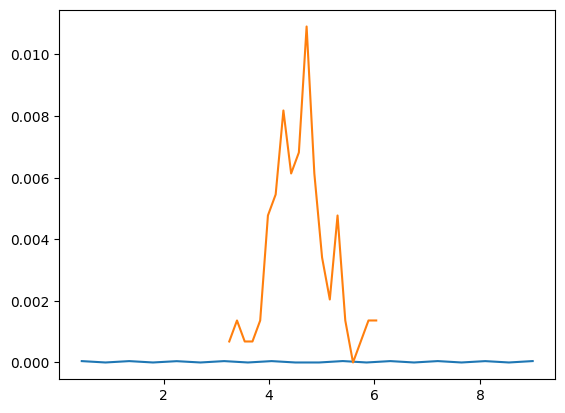

In [8]:
population : np.ndarray = np.random.randint(0, 10,size=5000)
count, bins = np.histogram(population, bins=20, density=True)
pdf = count/len(population)
plt.plot(bins[1:], pdf)
pop_mean = np.mean(population)
pop_var = np.var(population)

sample: list[float] = []
for i in range(100): 
    points: np.array = np.random.choice(population, size=30, replace=False)
    sample.append(points.mean())

count_sample, bins_sample= np.histogram(sample, bins=20, density=True)
pdf_ = count_sample/len(sample)
sam_mean = np.mean(sample)
sam_var = np.var(sample)
hypo_var_pop = sam_var*30
print(f'sam_mean = {sam_mean:.2f}, sam_var = {sam_var:.2f}, pop_mean = {pop_mean:.2f}, pop_var = {pop_var:.2f}, hypo_var_pop = {hypo_var_pop:.2f}')
plt.plot(bins_sample[1:], pdf_)
plt.show()

Quantile - Quantile plot 

101


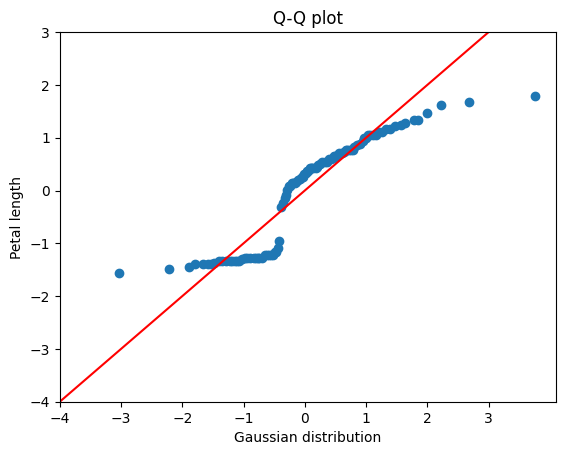

In [9]:
srt = np.sort(pl_std, axis=0)
dataset = np.array(())
for i in range(101):
    dataset = np.append(dataset, np.percentile(srt,i))
print(len(dataset))
measurement = np.random.normal(loc=0, scale=1, size=1000)
dataset2 = np.array(())
for i in range(101):
    dataset2 = np.append(dataset2, np.percentile(measurement, i))
plt.scatter(dataset2, dataset)
plt.axline((0, 0), slope = 1, color = 'red')
plt.xticks(np.arange(-4, 4, 1))
plt.yticks(np.arange(-4, 4, 1))
plt.xlabel('Gaussian distribution')
plt.ylabel('Petal length')
plt.title("Q-Q plot")
plt.show()

Using scipy

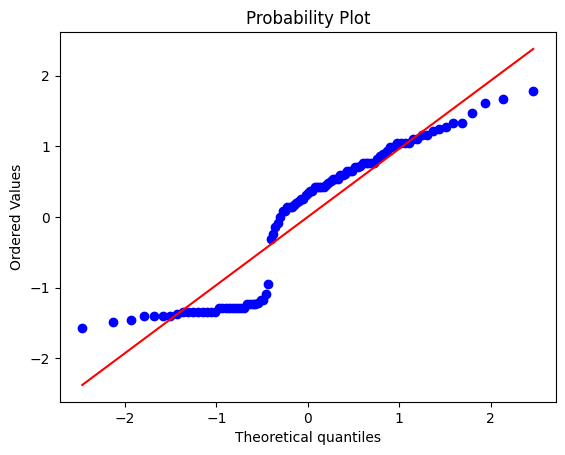

In [10]:
import scipy.stats as stats
a = stats.probplot(dataset, dist="norm", plot=plt)
plt.show()

How to randomly select elements of an array with NumPy in Python?

In [20]:
arr = np.arange(0,1000,1)
rand_choice = np.random.choice(arr, size=5, replace=True)
print(rand_choice)

arr2 = np.array(['Python', 'Java', 'C', 'PHP', 'Ruby'])
rand_choice2 = np.random.choice(arr2, size = (2,2), replace=True, p=[0.1,0.2,0.2,0.2,0.3])
print(rand_choice2)

[659 735 671 510 174]
[['C' 'Java']
 ['Python' 'Ruby']]


Box-cox transform